<a href="https://colab.research.google.com/github/ElcimarAires/Projetos-Pessoais/blob/main/ELT574_118579_Atividade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DE VIÇOSA - UFV**

**PÓS-GRADUACAO EM INTELIGENCIA ARTIFICIAL E COMPUTACIONAL**

Disciplina ELT574 - Aprendizado de Máquina

Elcimar Aires de Brito

Matrícula 118579

In [1]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [2]:
!pip install simpful
import simpful as sf

In [3]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



Definindo as variáveis de entrada

1. Qualidade do serviço (Service quality)

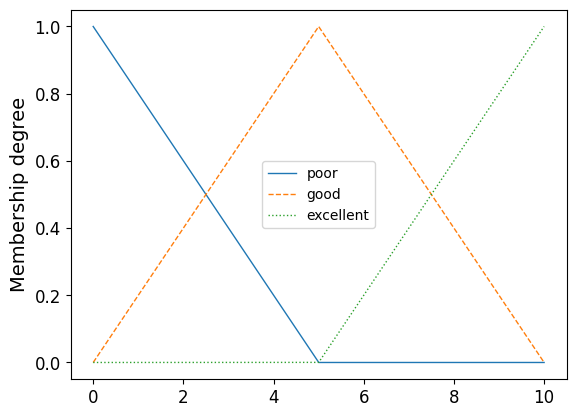

In [4]:
S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") # saida = [0% 100% 0%]
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([S_1, S_2, S_3], universe_of_discourse=[0, 10]).plot()

2. Qualidade da comida (Food quality)

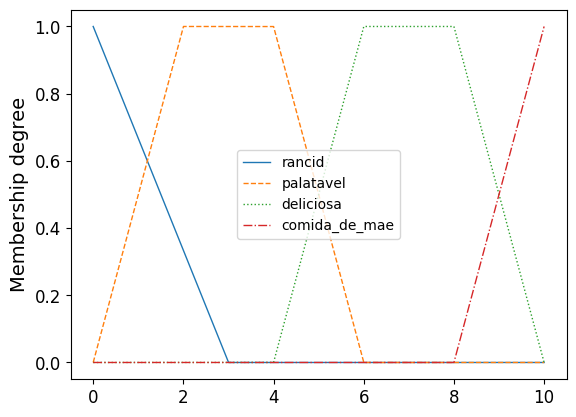

In [5]:
F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=3), term="rancid")
F_2 = FuzzySet(function=Trapezoidal_MF(a=0, b=2, c=4, d=6), term="palatavel")
F_3 = FuzzySet(function=Trapezoidal_MF(a=4, b=6, c=8, d=10), term="deliciosa")
F_4 = FuzzySet(function=Triangular_MF(a=8, b=10, c=10), term="comida_de_mae")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1,F_2,F_3,F_4], concept="Food quality", universe_of_discourse=[0,10]))

sf.LinguisticVariable([F_1,F_2,F_3,F_4], universe_of_discourse=[0, 10]).plot()

Definindo a variável de saída

Gorjeta (Tip)

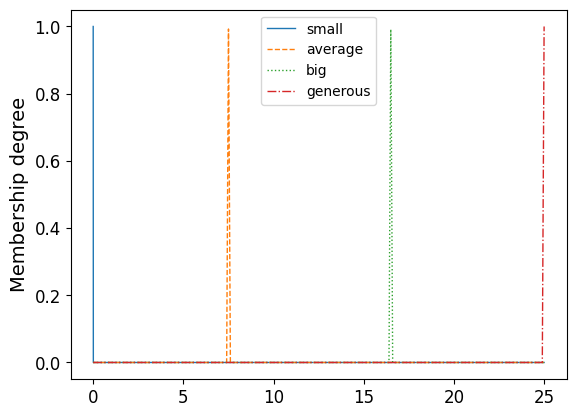

In [6]:
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.0001), term="small") # [0%, 100%, 0%]
T_2 = FuzzySet(function=Triangular_MF(a=7.4, b=7.5, c=7.6), term="average")
T_3 = FuzzySet(function=Triangular_MF(a=16.4, b=16.5, c=16.6), term="big")
T_4 = FuzzySet(function=Triangular_MF(a=24.9, b=25, c=25.1), term="generous") # [0%, 100%, 100%, 0%]
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0,25]))

sf.LinguisticVariable([T_1, T_2, T_3, T_4], universe_of_discourse=[0, 25]).plot()

**Definindo a base de regras**

1- SE Serviço é Ruim E Comida é Ruim, ENTÃO Gojeta é Pequena

2- SE Serviço é Bom, ENTÃO Gojerta é Média

3- SE Serviço é Excelente OU Comida é Deliciosa, ENTÃO Gojeta é Generosa

In [7]:
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS poor) AND (Food IS palatavel) THEN (Tip IS average)"
R3 = "IF (Service IS poor) AND (Food IS deliciosa) THEN (Tip IS average)"
R4 = "IF (Service IS good) AND (Food IS rancid) THEN (Tip IS average)"
R5 = "IF (Service IS good) AND (Food IS palatavel) THEN (Tip IS big)"
R6 = "IF (Service IS good) AND (Food IS deliciosa) THEN (Tip IS big)"
R7 = "IF (Service IS excellent) OR (Food IS comida_de_mae) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3, R4, R5, R6, R7])

Repassando os valores de entrada

Serviço = 8

Comida = 3

In [8]:
servico = 8
comida = 3

FS.set_variable("Service", servico)
FS.set_variable("Food", comida)

Calculando o valor de inferência

In [9]:
print(FS.Mamdani_inference(["Tip"]))

{'Tip': 20.1423854710945}


2 - Calculando os resultados com valores:

Comida = 8

Serviço = 6

In [11]:
servico = 6
comida = 8

FS.set_variable("Service", servico)
FS.set_variable("Food", comida)

print(FS.Mamdani_inference(["Tip"]))

{'Tip': 17.95716347164122}


Tentando alcançar o máximo da Gorjeta

Comida = 10

Serviço = 10

In [12]:
servico = 10
comida = 10
FS.set_variable("Service", servico)
FS.set_variable("Food", comida)

print(FS.Mamdani_inference(["Tip"]))


{'Tip': 24.974995027078364}


**Conclusão**

O valor máximo de gorjeta no método MANDANI não atinge exatamente 25 devido às características do método de defuzzificação e às pequenas variações nas funções de pertinência triangulares e trapezoidais. O resultado é muito próximo de 25, mas não exatamente 25, por causa da maneira como as áreas sob as curvas dos conjuntos fuzzy são combinadas durante o processo de defuzzificação.

2. Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as funções das regras propostas na atividade. Calcule a saída para ambas as entradas do item 1. É possível alcançar o valor máximo de gorjeta neste tipo de inferência?

# **Método de inferência: Takagi-Sugeno-Kang**

ENTRADAS:

Comida = 3

Serviço = 8

In [14]:
from simpful import *

# A simple fuzzy inference system for the tipping problem
# Create a fuzzy system object
FS_TS = FuzzySystem()

# Define fuzzy sets and linguistic variables
S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

# Define output crisp values
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# Define function for generous tip (food score + service score + 5%)
FS_TS.set_output_function("generous", "1*Food+1*Service+5")

# Define fuzzy rules
R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

# Set antecedents values
FS_TS.set_variable("Service", 8)
FS_TS.set_variable("Food", 3)

# Perform Sugeno inference and print output
print(FS_TS.Sugeno_inference(["Tip"]))

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful

 * Detected Sugeno model type
{'Tip': 15.6}


ENTRADAS:

Comida = 8

Serviço = 6

In [23]:
# Set antecedents values
FS_TS.set_variable("Service", 6)
FS_TS.set_variable("Food", 8)

# Perform Sugeno inference and print output with more decimal places
result = FS_TS.Sugeno_inference(["Tip"])
print(f"Tip: {result['Tip']:.6f}")

Tip: 17.000000


Testando para tentar alcançar o máximo da gorjeta

In [22]:
# Set antecedents values
FS_TS.set_variable("Service", 10)
FS_TS.set_variable("Food", 10)

# Perform Sugeno inference and print output with more decimal places
result = FS_TS.Sugeno_inference(["Tip"])
print(f"Tip: {result['Tip']:.6f}")


Tip: 25.000000


**Conclusão**

O método Sugeno é capaz de alcançar o valor máximo de gorjeta (25) porque utiliza funções de saída matemáticas precisas que calculam diretamente a saída com base nas entradas. No seu exemplo, a função generous foi definida de maneira a atingir exatamente 25 quando Service e Food são ambos 10, garantindo a precisão desejada sem as variações introduzidas pelo processo de defuzzificação do método Mamdani.